# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til intergers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [3]:
kolonner_obj = df.select_dtypes(include=['object']).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [4]:
for i in kolonner_obj:
    print("-----------")
    print(i)
    print("-----------")
    for num, j in enumerate(list(df[i].unique())):
        print("{} = {}".format(j,num))
        df[i].loc[df[i]==j] = num
    df[i] = pd.to_numeric(df[i])

-----------
BusinessTravel
-----------
Travel_Frequently = 0
Travel_Rarely = 1
Non-Travel = 2
-----------
Department
-----------
Research & Development = 0
Sales = 1
Human Resources = 2
-----------
EducationField
-----------
Medical = 0
Other = 1
Marketing = 2
Life Sciences = 3
Technical Degree = 4
Human Resources = 5
-----------
Gender
-----------
Male = 0
Female = 1
-----------
JobRole
-----------
Laboratory Technician = 0
Sales Representative = 1
Sales Executive = 2
Healthcare Representative = 3
Manager = 4
Manufacturing Director = 5
Research Scientist = 6
Human Resources = 7
Research Director = 8
-----------
MaritalStatus
-----------
Married = 0
Divorced = 1
Single = 2
-----------
Over18
-----------
Y = 0
-----------
OverTime
-----------
Yes = 0
No = 1


C:\Users\filip\AppData\Local\Temp\ipykernel_26692\3482823818.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[i].loc[df[i]==j] = num
C:\Users\filip\AppData\Local\Temp\ipykernel_26692\3482823818.py:7: SettingWithCopyWarning: 
A value is

I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [5]:
print(df.dtypes)

id                          int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [6]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

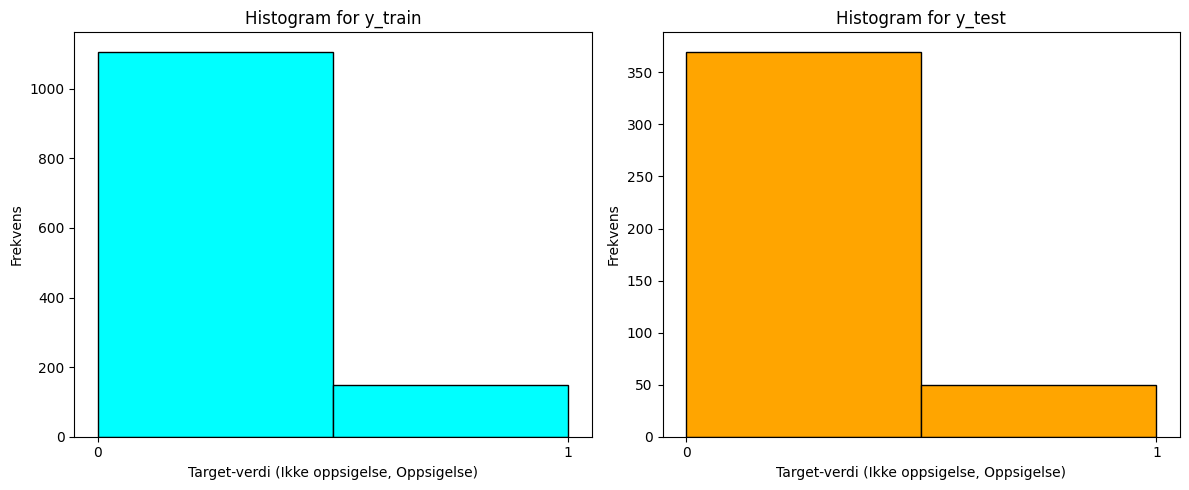

In [39]:
#TODO: visualiser y_train og y_test i et histogram

import matplotlib.pyplot as plt

# Plotter histogrammet til y_train
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=2, color='cyan', edgecolor='black')
plt.title("Histogram for y_train")
plt.xlabel("Target-verdi (Ikke oppsigelse, Oppsigelse)")
plt.ylabel("Frekvens")
plt.xticks([0, 1])

# Plotter histogrammet til y_test
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=2, color='orange', edgecolor='black')
plt.title("Histogram for y_test")
plt.xlabel("Target-verdi (Ikke oppsigelse, Oppsigelse)")
plt.ylabel("Frekvens")
plt.xticks([0, 1])

plt.tight_layout()
plt.show()

**Skrevet av Filip Andreas Larsen, student-id 240987**

**Svar:**

Ut ifra histogrammene kan man tyde at det er snakk om binære kategoriske variabler, ved at verdiene kun kan være 0 eller 1.

Ofte vil talldata som er delt inn i satte intervaller være diskrete variabler, men i dette tilfellet peker 0 og 1 til kategorier, og variabeltypen er derfor kategorisk.

For kategoriske og diskrete variabeltyper vil problemene normalt knyttes til klassifisering, der kontinuerlige variabler er mer egnet for regresjonsanalyser.

Med binære klassifikasjonsproblemer kan man se etter en sammenheng mellom en avhengig variabel, og flere uavhengige variabler, for å kunne predikere om den avhengige variablen skal tilhøre 0 eller 1.


Siden y-train og y-test er kategoriske variabler kan man gå ut ifra at man skal løse et klassifiseringsproblem.

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

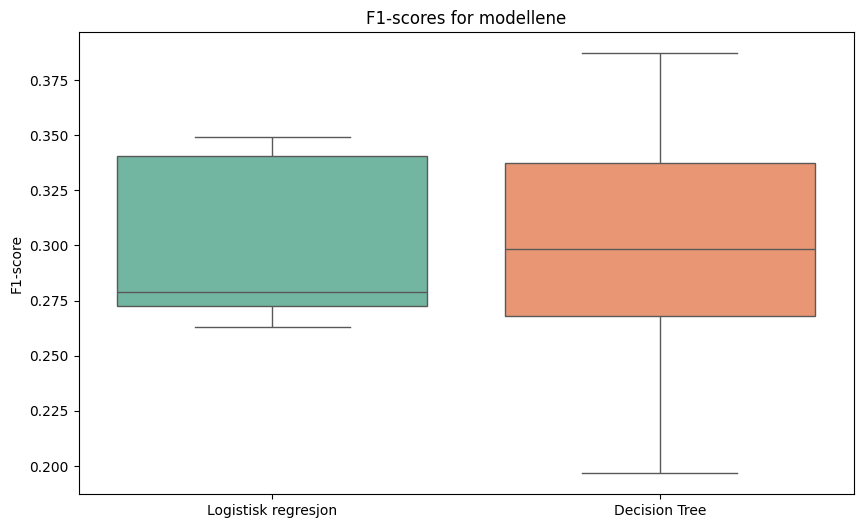

T-statistikk: 0.1711, P-verdi: 0.8645


In [ ]:
#TODO: repeterte kryssvalideringer for to modeller

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scipy.stats import ttest_ind
import seaborn as sns
import numpy as np

# Initialiser modeller
model_1 = LogisticRegression(class_weight='balanced')
model_2 = DecisionTreeClassifier()

# Kryssvalidering
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Repeterte kryssvalideringer (10 ganger) og loggføring av F1-score og accuracy
f1_scores_model_1, f1_scores_model_2 = [], []
accuracy_scores_model_1, accuracy_scores_model_2 = [], []

for _ in range(10):
    f1_scores_model_1.extend(cross_val_score(model_1, X_train, y_train, cv=kf, scoring='f1'))
    f1_scores_model_2.extend(cross_val_score(model_2, X_train, y_train, cv=kf, scoring='f1'))
    accuracy_scores_model_1.extend(cross_val_score(model_1, X_train, y_train, cv=kf, scoring='accuracy'))
    accuracy_scores_model_2.extend(cross_val_score(model_2, X_train, y_train, cv=kf, scoring='accuracy'))

# Visualiser F1-skårene med boksplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[f1_scores_model_1, f1_scores_model_2], palette="Set2")
plt.xticks([0, 1], ['Logistisk regresjon', 'Decision Tree'])
plt.ylabel('F1-score')
plt.title('F1-score for modellene')
plt.show()

# T-test på F1-scorene
t_stat, p_val = ttest_ind(f1_scores_model_1, f1_scores_model_2)
print(f"T-statistikk: {t_stat:.4f}, P-verdi: {p_val:.4f}")

**Svar:**

Man kan se at det er ganske jevnt resultat mellom logistisk regresjon og decision tree, men at det er en forskjell i variasjonen til de to modellene.

Logistic regression kan antas å være litt jevnere enn decision tree, som kan tyde på at den tåler forandringer i datasettet bedre enn decision tree.

En lav T-statistikk og høy P-verdi tyder på at det ikke er signifikant forskjell mellom de to modellene i forhold til f1-score.

Ut ifra f1-scoren til de to modellene kan man dermed ikke påpeke at den ene modellen er bedre enn den andre.

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

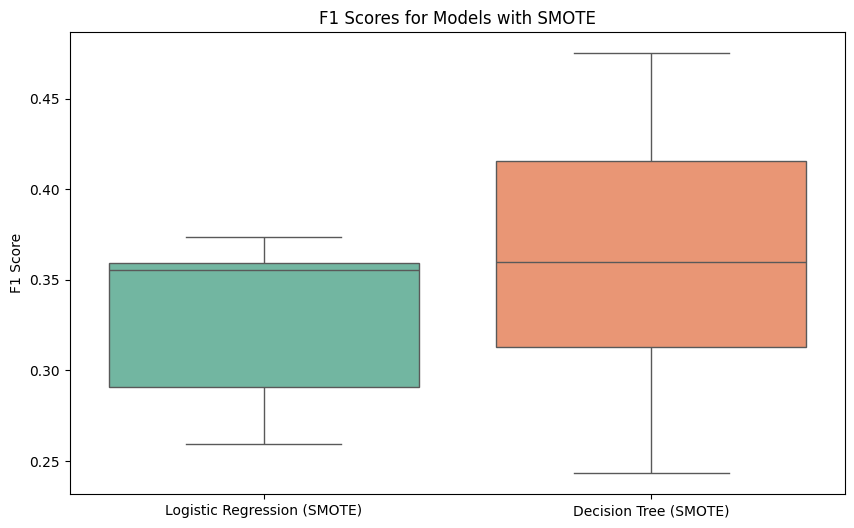

T-statistic (SMOTE): -2.9797, P-value (SMOTE): 0.0036


In [ ]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
#from imblearn.over_sampling import SMOTE


from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, accuracy_score

# Initialiser SMOTE
smote = SMOTE(random_state=0)

# Repeterte kryssvalideringer med SMOTE
f1_scores_smote_model_1, f1_scores_smote_model_2 = [], []
accuracy_scores_smote_model_1, accuracy_scores_smote_model_2 = [], []

for _ in range(10):
    for train_index, val_index in kf.split(X_train, y_train):
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train.iloc[train_index], y_train.iloc[train_index])
        
        # Modell 1 (Logistisk regresjon)
        model_1.fit(X_train_resampled, y_train_resampled)
        y_pred = model_1.predict(X_train.iloc[val_index])
        f1_scores_smote_model_1.append(f1_score(y_train.iloc[val_index], y_pred))
        accuracy_scores_smote_model_1.append(accuracy_score(y_train.iloc[val_index], y_pred))

        # Modell 2 (Decision Tree)
        model_2.fit(X_train_resampled, y_train_resampled)
        y_pred = model_2.predict(X_train.iloc[val_index])
        f1_scores_smote_model_2.append(f1_score(y_train.iloc[val_index], y_pred))
        accuracy_scores_smote_model_2.append(accuracy_score(y_train.iloc[val_index], y_pred))

# Visualiser F1-scorene med boksplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[f1_scores_smote_model_1, f1_scores_smote_model_2], palette="Set2")
plt.xticks([0, 1], ['Logistisk regresjon', 'Decision Tree'])
plt.ylabel('F1-score')
plt.title('F1-score for de to modellene')
plt.show()

# T-test på F1-scorene med SMOTE
t_stat_smote, p_val_smote = ttest_ind(f1_scores_smote_model_1, f1_scores_smote_model_2)
print(f"T-statistikk: {t_stat_smote:.4f}, P-verdi: {p_val_smote:.4f}")

**Svar:**

Smote benyttes for å kunne oppsample minoritetsklassen, og dermed kunne balansere datasettet.

Denne gangen fikk man en T-statistikk på rundt -3, og en P-verdi poå 0.0036. Dette tilsier at det er en statistisk signifikant forskjell mellom F1-scoren til modellene. Denne grensen går på P < 0.05.

Dette skiller seg fra 2.2, der det ikke var en statistisk signifikant forskjell mellom F1-scoren til modellene.

Rent visuelt kan man se at box-plotet til logistisk regresjon ser relativt likt ut i 2.3 som i 2.2, men dette kan skyldes at denne modellen hadde et balansert datasett også i 2.2.

Decision tree fikk en stor økning i spredningen til box-plotet, som vitner om at kvaliteten til modellen øker ved enkelte iterasjoner, mens den er lik som før eller dårligere ved andre iterasjoner.

Man må derfor drøfte om denne modellen egentlig er bedre, for den kan oppnå bedre f1-score, men med den store spredningen vil man ikke oppnå jevnt gode resultater.

Logistisk har jevne resultater, mens Decision tree har et snitt som er høyere enn logistisk sitt. Likevel er det verdt å merke at decision tree preges av større spredning i f1-score enn logistisk.

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [32]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene

from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score

# Trener den beste modellen på hele treningssettet
best_model = model_1 if np.mean(f1_scores_model_1) > np.mean(f1_scores_model_2) else model_2
best_model.fit(X_train, y_train)

# Prediksjon på testsettet
y_test_pred = best_model.predict(X_test)

# Måler ytelsen på testsettet
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Beregner spesifisitet
conf_matrix = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Printe ut ytelsesmålene
print(f"Sensitivitet: {recall:.4f}")
print(f"Spesifisitet: {specificity:.4f}")
print(f"Presisjon: {precision:.4f}")
print(f"F1-skår: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Sensitivitet: 0.6400
Spesifisitet: 0.6784
Presisjon: 0.2119
F1-skår: 0.3184
Accuracy: 0.6738


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [36]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

#TODO: Gjør kjønnsbasert analyse på testdataene

# Filter testsettet basert på kjønn
male_indices = X_test[X_test['Gender'] == 0].index  # Anta at 0 = menn, 1 = kvinner
female_indices = X_test[X_test['Gender'] == 1].index

# Prediksjoner for menn
y_pred_male = best_model.predict(X_test.loc[male_indices])
y_test_male = y_test.loc[male_indices]

# Prediksjoner for kvinner
y_pred_female = best_model.predict(X_test.loc[female_indices])
y_test_female = y_test.loc[female_indices]

# Beregner sensitivitet, spesifisitet og presisjon for menn
precision_male = precision_score(y_test_male, y_pred_male)
recall_male = recall_score(y_test_male, y_pred_male)
conf_matrix_male = confusion_matrix(y_test_male, y_pred_male)
tn_male, fp_male, fn_male, tp_male = conf_matrix_male.ravel()
specificity_male = tn_male / (tn_male + fp_male)

# Beregn sensitivitet, spesifisitet og presisjon for kvinner
precision_female = precision_score(y_test_female, y_pred_female)
recall_female = recall_score(y_test_female, y_pred_female)
conf_matrix_female = confusion_matrix(y_test_female, y_pred_female)
tn_female, fp_female, fn_female, tp_female = conf_matrix_female.ravel()
specificity_female = tn_female / (tn_female + fp_female)

# Skriv ut resultatene
print(f"Menn - Sensitivitet: {recall_male:.4f}, Spesifisitet: {specificity_male:.4f}, Presisjon: {precision_male:.4f}")
print(f"Kvinner - Sensitivitet: {recall_female:.4f}, Spesifisitet: {specificity_female:.4f}, Presisjon: {precision_female:.4f}")

Menn - Sensitivitet: 0.5833, Spesifisitet: 0.6866, Presisjon: 0.2360
Kvinner - Sensitivitet: 0.7857, Spesifisitet: 0.6667, Presisjon: 0.1774


**Svar:**

Modellen har en betydelig forskjell i kvalitet for de to kjønnene, der sensitiviteten på for menn er på 58,3%, og dermed korrekt identifiserte en lav andel menn. 

For kvinner er 78,5% korrekt identifisert, som kan antyde at modellen lener seg på å klassifisere tilfeller som kvinner i større grad en den klassifiserer et tilfelle som mann.

Denne teorien styrkes av presisjonen til menn (23,6%) er høyere enn kvinner sin (17,7%), som viser at modellen predikerer for mange kvinner i større grad enn den predikerer for mange menn.

En mulig grunn til denne skjevfordelingen kan være at det er skjevhet i datasettet. Da må man utføre eventuelle tiltak, som å balansere datasettet. Et mulig tiltak er SMOTE.

Dersom det er et generelt problem til at det er skjevhet mellom menn og kvinner, kan man vurdere å dele datasettet i to, der menn og kvinner predikeres hver for seg. 

Dette er nok mer relevant i helsesammenheng, men når det gjelder oppsigelser som i dette tilfellet vil det være et etiskt dilemma å skille de to kjønnene på en slik måte.



**Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet**

In [ ]:
#!pip freeze > requirements.txt